In [1]:
""" required packages to run model """
import pandas as pd  # for manipulating dataframes
from sklearn.preprocessing import LabelEncoder  # encoding data
from sklearn.model_selection import train_test_split  # splitting data
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler  # scaling data between 2 values
from sklearn.feature_selection import SelectKBest, f_classif  # feature engineering models
from xgboost import XGBClassifier
from sklearn.metrics import classification_report  # for evaluating results
from sklearn.metrics import confusion_matrix  # for evaluating results
import matplotlib.pyplot as plt  # plotting data
import seaborn as sns  # plotting data


""" read train data """
train_data = pd.read_csv("Train_v2.csv")
""" exploring train data """
train_data.shape  # shape of train data (how many lines and columns)


(23524, 13)

In [2]:
train_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [3]:

train_data.describe()


,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [4]:
""" read test data """
test_data_for_csv = pd.read_csv("Test_v2.csv")
test_data = pd.read_csv("Test_v2.csv")
""" exploring test data """
test_data.columns

Index(['country', 'year', 'uniqueid', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')

In [5]:
test_data.shape

(10086, 12)

In [6]:
10086 /23524


0.42875361333106615

In [7]:
test_data.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [8]:
""" dropping unecessaary columns 
 We've decided to drop these columns after some feature engineering steps 
 uniqueid is unecessary from the start
"""
test_data = test_data.drop(["uniqueid", "year", "relationship_with_head"], axis=1)  # axis = 1 to drop columns not lines

""" get list of categorical features """
categorical_features = ["year", "country", "location_type", "cellphone_access", "gender_of_respondent", "relationship_with_head",
                        "marital_status", "education_level", "job_type"]

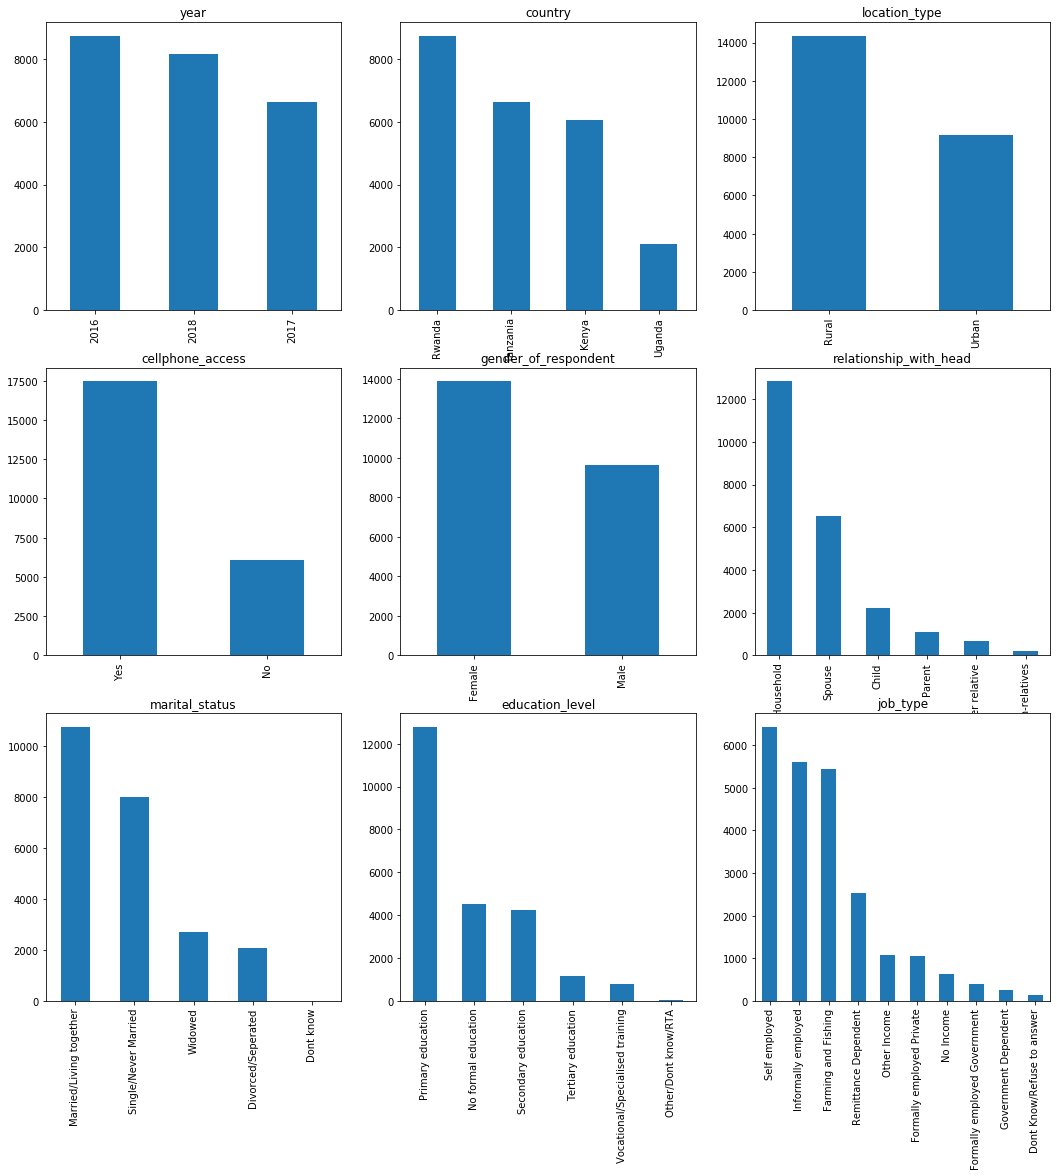

In [9]:

""" plot categorical features """
ROWS, COLS = 3, 3
fig, ax = plt.subplots(ROWS, COLS, figsize=(18, 18))
row, col = 0, 0
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    train_data[categorical_feature].value_counts().plot(kind='bar', ax=ax[row, col]).set_title(categorical_feature)
plt.show()



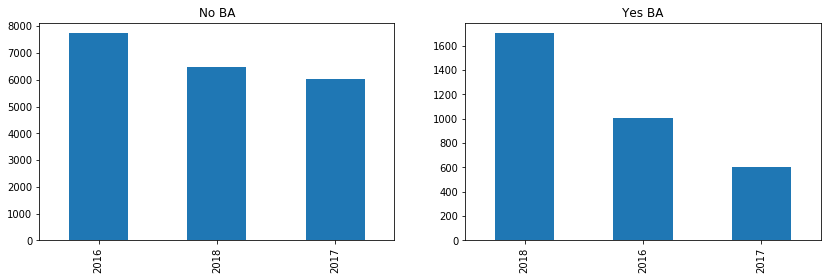

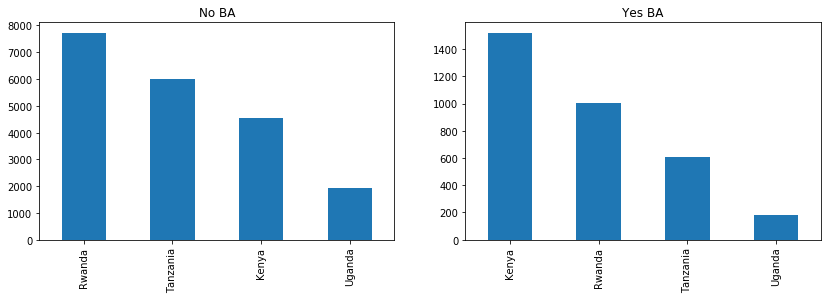

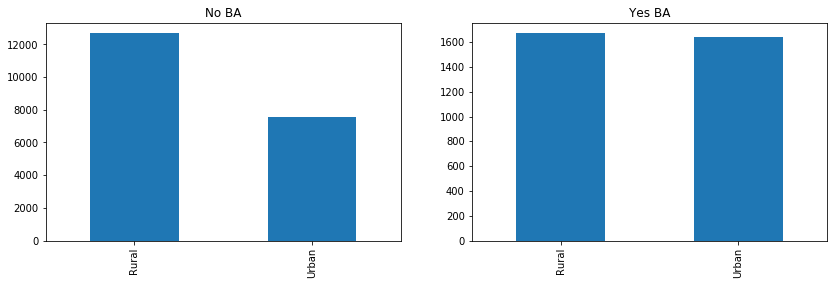

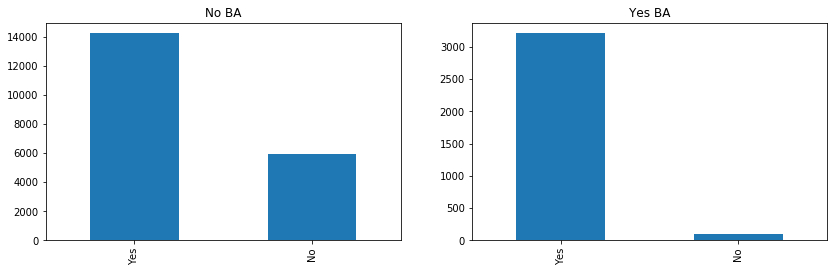

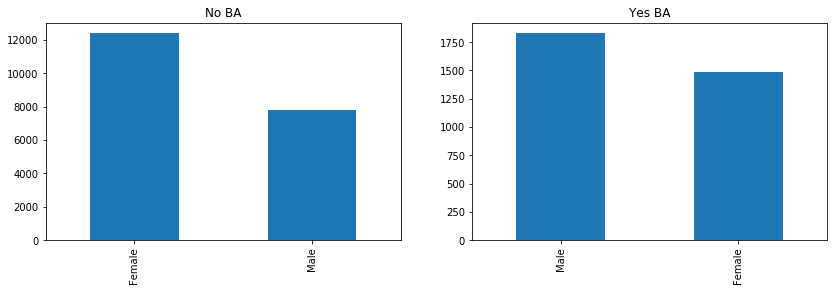

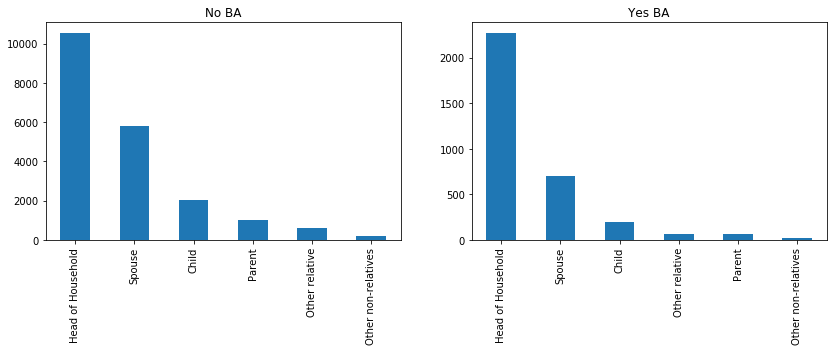

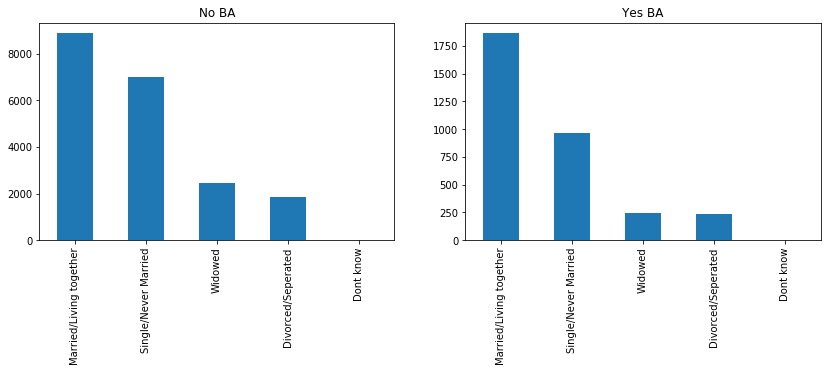

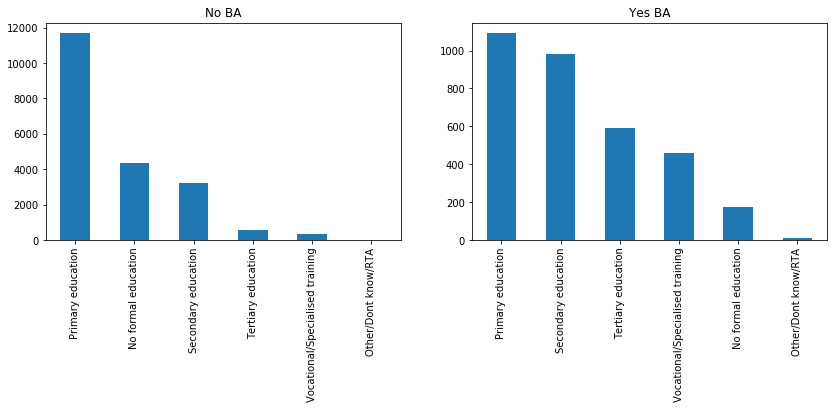

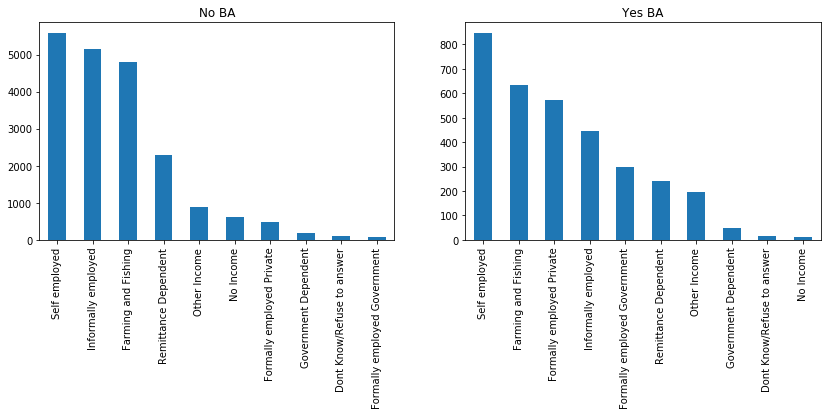

In [10]:
""" plot categorical features with the target variable """  # Men are more likely to have bank account than women
for feature in categorical_features:

    fig, ax = plt.subplots(1, 2, figsize=(14, 4))
    train_data[train_data.bank_account == "No"][feature].value_counts().plot(kind="bar", ax=ax[0]).set_title("No BA")
    train_data[train_data.bank_account == "Yes"][feature].value_counts().plot(kind="bar", ax=ax[1]).set_title("Yes BA")
    plt.show()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23524 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
bank_account              23524 non-null object
location_type             23524 non-null object
cellphone_access          23524 non-null object
household_size            23524 non-null int64
age_of_respondent         23524 non-null int64
gender_of_respondent      23524 non-null object
relationship_with_head    23524 non-null object
marital_status            23524 non-null object
education_level           23524 non-null object
job_type                  23524 non-null object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


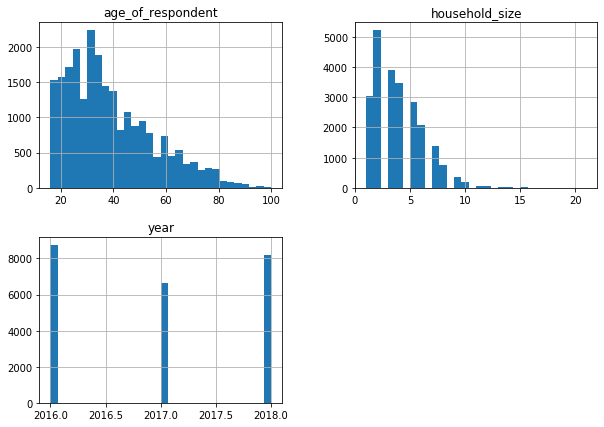

In [11]:
""" plot numerical features """
train_data.info()
numerical_features = ["household_size", "age_of_respondent", "year"]
train_data[numerical_features].describe()
train_data[numerical_features].hist(bins=30, figsize=(10, 7))
plt.show()



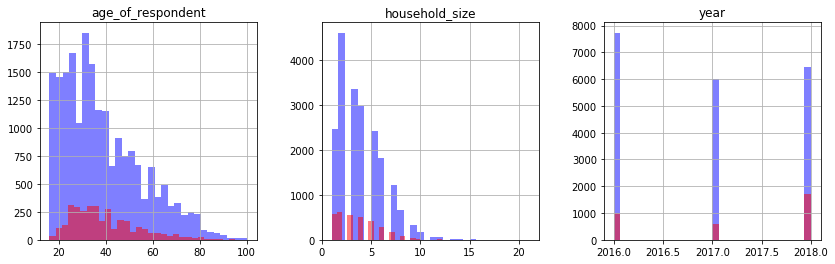

In [12]:
""" plot numerical features with the target variable """
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
train_data[train_data.bank_account == "No"][numerical_features].hist(bins=30, color="blue", alpha=0.5, ax=ax)
train_data[train_data.bank_account == "Yes"][numerical_features].hist(bins=30, color="red", alpha=0.5, ax=ax)
plt.show()



In [13]:
""" Separate the target variable and rest of the variables """
X = train_data.drop(["uniqueid", "bank_account", "year", "relationship_with_head"], axis=1)
Y = train_data.bank_account

""" label encoding target variable (binary classification) """
# 1 means have bank_account, 0 means does not have bank_account
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
Y



array([1, 0, 1, ..., 0, 0, 0])

In [14]:
X.shape
""" One hot encoding of other categorical variables """
X = pd.get_dummies(X)
X.shape



(23524, 33)

In [15]:
test_data = pd.get_dummies(test_data)

In [16]:
test_data.shape

(10086, 33)

In [17]:
10086/23524

0.42875361333106615

In [18]:
""" scaling features to [0,1] interval """
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

test_data = scaler.fit_transform(test_data)

In [19]:
""" feature engineering/selection """

bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X, Y)
dfscores = pd.DataFrame(fit.scores_)
print("df scores :", dfscores)
dfcolumns = pd.DataFrame(pd.DataFrame(X).columns)
print(dfcolumns)
print(type(dfcolumns))

df scores :               0
0     18.888950
1      8.882457
2    845.205564
3     77.695467
4    185.029465
5     57.077277
6    180.595902
7    180.595902
8   1081.598580
9   1081.598580
10   327.786325
11   327.786325
12    14.844658
13     0.788940
14   177.399168
15    39.164210
16    65.174425
17   488.671140
18     8.724230
19   731.796655
20   365.533428
21  1462.690988
22  1340.350561
23     0.922509
24    33.990527
25  1386.103268
26  1561.163228
27     7.841360
28   230.245207
29    77.000364
30    15.501107
31    49.229700
32     6.006286
     0
0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
10  10
11  11
12  12
13  13
14  14
15  15
16  16
17  17
18  18
19  19
20  20
21  21
22  22
23  23
24  24
25  25
26  26
27  27
28  28
29  29
30  30
31  31
32  32
<class 'pandas.core.frame.DataFrame'>


In [20]:
""" concat two dataframes for better visualization """
featureScores = pd.concat([dfcolumns, dfscores], axis=1)

featureScores


,0,0
0,0,18.888950
1,1,8.882457
2,2,845.205564
3,3,77.695467
4,4,185.029465
5,5,57.077277
6,6,180.595902
7,7,180.595902
8,8,1081.598580
9,9,1081.598580


In [21]:
train_data.shape


(23524, 13)

In [22]:
X.shape

(23524, 33)

In [23]:
""" split the data into train and test data """
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print('X_train shape : ',X_train.shape)
print('y_test shape : ',y_test.shape)
print('X_test shape : ',X_test.shape)
print('test_data shape : ',test_data.shape)



X_train shape :  (18819, 33)
y_test shape :  (4705,)
X_test shape :  (4705, 33)
test_data shape :  (10086, 33)


In [24]:
""" applying XGBoost algorithm """
xgb = XGBClassifier(max_depth=10)
xgb.fit(X_train, y_train)
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
print(" xgboost on train set : {:.2f}%".format((acc_train*100)))
print(" xgboost on test set : {:.2f}%".format((acc_test*100)))

 xgboost on train set : 92.20%
 xgboost on test set : 88.01%


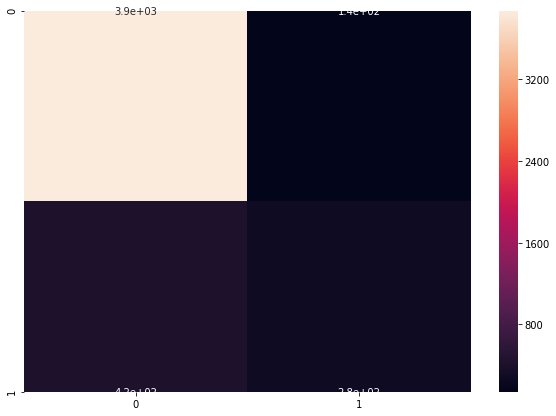

Confusion Matrix :  [[3866  139]
 [ 425  275]]


In [25]:
""" plotting confusion matrix """
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.show()
print("Confusion Matrix : ", cm)

In [26]:
predictions = pd.DataFrame(y_pred_test)
predictions[0].value_counts()


0    4291
1     414
Name: 0, dtype: int64

In [27]:
predictions

,0
0,0
1,0
2,0
3,0
4,0
...,...
4700,0
4701,1
4702,0
4703,0


In [28]:
prediction_true = pd.DataFrame(y_test)
prediction_true[0].value_counts()

0    4005
1     700
Name: 0, dtype: int64

In [29]:
test_data.shape
print("classification report : \n ", classification_report(y_test, y_pred_test))

classification report : 
                precision    recall  f1-score   support

           0       0.90      0.97      0.93      4005
           1       0.66      0.39      0.49       700

    accuracy                           0.88      4705
   macro avg       0.78      0.68      0.71      4705
weighted avg       0.87      0.88      0.87      4705

